<a href="https://colab.research.google.com/github/durgarao150/hello-world/blob/master/Assignment2MISQn4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

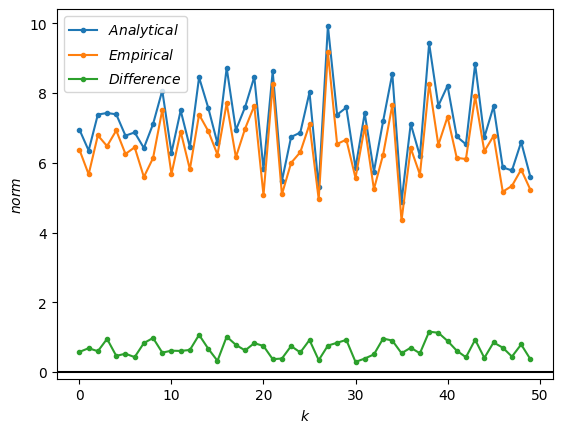

In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
m=9
n=6
test_size = 100000
no_of_tries = 50

actual_Inf_norm_list=[]
empirical_inf_norm_list=[]
diff_list = []

for i in range(no_of_tries):
    A = np.random.randn(m, n)
    x = np.random.randn(n, test_size)
    B = A @ x

    actual_Inf_norm = np.max(np.sum(np.abs(A),1))
    actual_Inf_norm_list.append(actual_Inf_norm)

    #||Ay||inf = maximum yi in y, when y is nx1 vector, here x has 100000 nx1 vectors, will take
    # the ratio of ||Ay||inf / ||y||inf and find the maximum among them to get the empirical inf norm of A
    ratio = np.max(np.abs(B),0)/np.max(np.abs(x),0)
    empirical_inf_norm = np.max(ratio)
    empirical_inf_norm_list.append(empirical_inf_norm)
    diff_list.append(actual_Inf_norm-empirical_inf_norm)

#print(actual_Inf_norm_list)
#print(empirical_inf_norm_list)

#Empirical value is always less than the Actual value for all 50 runs
#In the below graph the green line is the difference between the Analytical and empirical value
#And it is above x-axis implying the actual value is always greater than the empirical value
plt.plot(actual_Inf_norm_list,marker = ".",label = r"$Analytical$")
plt.plot(empirical_inf_norm_list,marker = ".",label = r"$Empirical$")
plt.plot(diff_list,marker = ".",label = r"$Difference$")
plt.legend()
plt.xlabel(r"$k$")
plt.ylabel(r"$norm$")

plt.axhline(y=0,color = 'black', linestyle = '-')
plt.savefig("Plotting Actual vs Empirical for L inf norm.pdf")

#The above plotting and comparision between analytical and empirical solution
#suggests that analytic solution is upper bound for the empirical approach.
#And I do not think it mathematically proves anything